# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)
cities_pd = pd.DataFrame({'Cities': cities})
cities_pd.head()

,Cities
0,kuala terengganu
1,husavik
2,rikitea
3,severo-kurilsk
4,mataura


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [13]:
Country = []
Latitude = []
Longitude = []
Temperature = []
Cloudiness = []
Date = []
Humidity = []
WindSpeed = []
#Initializing city count and set count
city_count = 1
set_count = 1
batch_size = 50

for index, row in cities_pd.iterrows():
    city = row["Cities"]
    response = requests.get(query_url + city).json()
   
    try:
        Country.append(response['sys']['country'])
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Temperature.append(response['main']['temp_max'])
        Cloudiness.append(response['clouds']['all'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        WindSpeed.append(response['wind']['speed'])
 #print log for each city as its being processed, with city number, batch number and city name.       
        print(f"Processing Record {city_count} of Set {set_count}|{city}")
        
        if city_count == batch_size:
            set_count += 1
            city_count = 1
        else:
            city_count += 1
            
# for cities without weather info enter NaN          
    except KeyError:
        Country.append(np.nan)
        Latitude.append(np.nan)
        Longitude.append(np.nan)
        Temperature.append(np.nan)
        Cloudiness.append(np.nan)
        Date.append(np.nan)
        Humidity.append(np.nan)
        WindSpeed.append(np.nan)
        
        print('City not found. Skipping...')
        

#appending all the information collected to the dataframe
cities_pd["Cloudiness"] = Cloudiness
cities_pd["Country"] = Country
cities_pd["Date"] = Date
cities_pd["Humidity"] = Humidity
cities_pd["Latitude"] = Latitude
cities_pd["Longitude"] = Longitude
cities_pd["Max Temp"] = Temperature
cities_pd["Wind Speed"] = WindSpeed
cities_pd = cities_pd.dropna(how = "any")

#exporting city data into a csv file
cities_pd.to_csv("cities.csv", index = False)

Processing Record 1 of Set 1|kuala terengganu
Processing Record 2 of Set 1|husavik
Processing Record 3 of Set 1|rikitea
Processing Record 4 of Set 1|severo-kurilsk
Processing Record 5 of Set 1|mataura
Processing Record 6 of Set 1|carnarvon
Processing Record 7 of Set 1|avarua
Processing Record 8 of Set 1|jacareacanga
Processing Record 9 of Set 1|codrington
Processing Record 10 of Set 1|hermanus
Processing Record 11 of Set 1|haimen
Processing Record 12 of Set 1|hasaki
Processing Record 13 of Set 1|hazorasp
Processing Record 14 of Set 1|severo-yeniseyskiy
Processing Record 15 of Set 1|dikson
Processing Record 16 of Set 1|rantauprapat
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1|ken caryl
Processing Record 18 of Set 1|kruisfontein
Processing Record 19 of Set 1|castro
City not found. Skipping...
Processing Record 20 of Set 1|albany
Processing Record 21 of Set 1|eyl
Processing Record 22 of Set 1|georgetown
Processing Record 23 of Set 1|terra santa
Pro

Processing Record 39 of Set 4|verkhnevilyuysk
Processing Record 40 of Set 4|wuwei
Processing Record 41 of Set 4|noumea
Processing Record 42 of Set 4|mogadishu
Processing Record 43 of Set 4|oudtshoorn
Processing Record 44 of Set 4|sao joao da barra
Processing Record 45 of Set 4|saldanha
Processing Record 46 of Set 4|stolbishche
Processing Record 47 of Set 4|campo formoso
Processing Record 48 of Set 4|port hedland
Processing Record 49 of Set 4|yining
Processing Record 50 of Set 4|longyearbyen
Processing Record 1 of Set 5|emerald
Processing Record 2 of Set 5|provideniya
Processing Record 3 of Set 5|morgan city
Processing Record 4 of Set 5|poum
City not found. Skipping...
Processing Record 5 of Set 5|kodiak
Processing Record 6 of Set 5|kavieng
Processing Record 7 of Set 5|cantaura
Processing Record 8 of Set 5|smidovich
Processing Record 9 of Set 5|nha trang
Processing Record 10 of Set 5|grand gaube
Processing Record 11 of Set 5|adrar
Processing Record 12 of Set 5|fort-shevchenko
City not f

Processing Record 33 of Set 8|rawson
Processing Record 34 of Set 8|inirida
Processing Record 35 of Set 8|santa rosa
Processing Record 36 of Set 8|nalut
Processing Record 37 of Set 8|waipawa
Processing Record 38 of Set 8|grand bank
Processing Record 39 of Set 8|vallenar
Processing Record 40 of Set 8|kisangani
Processing Record 41 of Set 8|gumla
Processing Record 42 of Set 8|san miguel
Processing Record 43 of Set 8|okha
Processing Record 44 of Set 8|grafton
Processing Record 45 of Set 8|sioux lookout
Processing Record 46 of Set 8|winnemucca
Processing Record 47 of Set 8|sinnamary
Processing Record 48 of Set 8|baikunthpur
Processing Record 49 of Set 8|choix
Processing Record 50 of Set 8|waterloo
Processing Record 1 of Set 9|okhotsk
Processing Record 2 of Set 9|riyadh
Processing Record 3 of Set 9|flin flon
Processing Record 4 of Set 9|viraganur
Processing Record 5 of Set 9|navalmoral de la mata
Processing Record 6 of Set 9|wahiawa
Processing Record 7 of Set 9|antalaha
Processing Record 8 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#reading csv file into DataFrame
cities_final = pd.read_csv("cities.csv")
cities_final.count()

Cities        569
Cloudiness    569
Country       563
Date          569
Humidity      569
Latitude      569
Longitude     569
Max Temp      569
Wind Speed    569
dtype: int64

In [11]:
cities_final["Date"] = cities_final["Date"].astype(int)
cities_final.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,kuala terengganu,75.0,MY,1561953326,74.0,5.33,103.14,87.80,5.82
1,husavik,33.0,CA,1561953452,43.0,50.56,-96.99,72.00,4.00
2,rikitea,59.0,PF,1561953452,61.0,-23.12,-134.97,69.86,12.64
3,severo-kurilsk,0.0,RU,1561953346,93.0,50.68,156.12,44.09,15.82
4,mataura,58.0,NZ,1561953361,67.0,-46.19,168.86,57.99,5.01


In [51]:
#converting unix timestamp to readable time for the first city in the database to use in the plots
readable_time = time.strftime("%D", time.localtime(cities_final["Date"][0]))
readable_time

'06/30/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

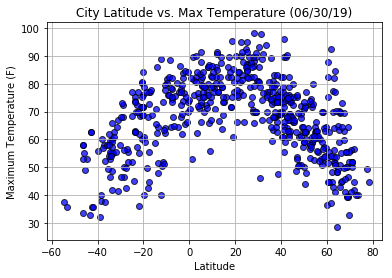

In [65]:
lat_vs_temp = plt.scatter(cities_final["Latitude"], cities_final["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
plt.title(f"City Latitude vs. Max Temperature ({readable_time})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlim(-62, 84)
plt.ylim(24,102)
plt.grid()
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

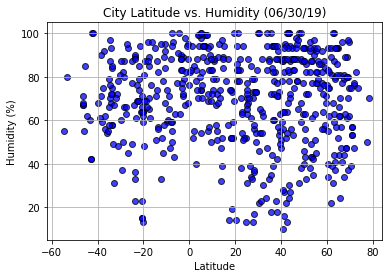

In [66]:
lat_vs_humidity = plt.scatter(cities_final["Latitude"], cities_final["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
plt.title(f"City Latitude vs. Humidity ({readable_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-62, 84)
plt.ylim(5,105)
plt.grid()
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

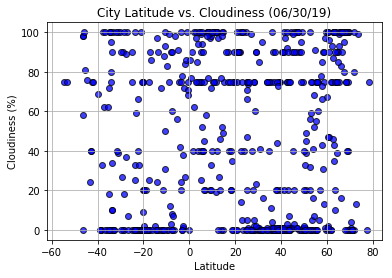

In [67]:
lat_vs_humidity = plt.scatter(cities_final["Latitude"], cities_final["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
plt.title(f"City Latitude vs. Cloudiness ({readable_time})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-62, 84)
plt.ylim(-5,105)
plt.grid()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

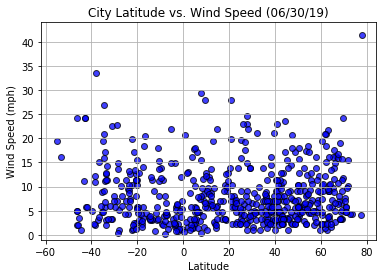

In [68]:
lat_vs_humidity = plt.scatter(cities_final["Latitude"], cities_final["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
plt.title(f"City Latitude vs. Wind Speed ({readable_time})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-62, 84)
plt.ylim(-1,44)
plt.grid()
plt.savefig("lat_vs_windspeed.png")
plt.show()

In [52]:
'''Trends
In the Temperature vs. Latitude scatter plot, the highest temperature observed between latitudes 20-40 Degress, while the temperature decreases as we move away from the equator(0).
In the Wind Speed (mph) vs. Latitude scatter plot, the average when speed for all cities is fairly low.
In the Humidity (%) vs. Latitude scatter plot, most cities situated between -20 to 20 degrees latitude had a humidity of 40% or more'''

'Trends\nIn the Temperature vs. Latitude scatter plot, the highest temperature observed between latitudes 20-40 Degress, while the temperature decreases as we move away from the equator(0).\nIn the Wind Speed (mph) vs. Latitude scatter plot, the average when speed for all cities is fairly low.\nIn the Humidity (%) vs. Latitude scatter plot, most cities situated between -20 to 20 degrees latitude had a humidity of 40% or more'